**Imports**

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree


When calling the DataFrame make sure to drop the first two columns because they aren non-predictive, so we don't use them in our predictions. You can use this code below to do that.

In [130]:
news = pd.read_csv(' https://richardson.byu.edu/220/OnlineNewsPopularity.csv')
news.columns = news.columns.str.strip()
news = news.drop(columns=news.columns[:2])
news.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity  \
0              4.680365  ...               0.100000                    0.7   
1              4.913725  ...               0.033333                    0.7   
2              4.393365  ...               0.100000                    1.0   
3              4.404896  ...               0.136364                    0.8   
4              4.682836  ...               0.033333                    1.0   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 59 columns]

**Exploratory Data Analysis (EDA):**

1. Plot the target variable. Determine if the target variable seems appropriate or if
any transformations are needed.


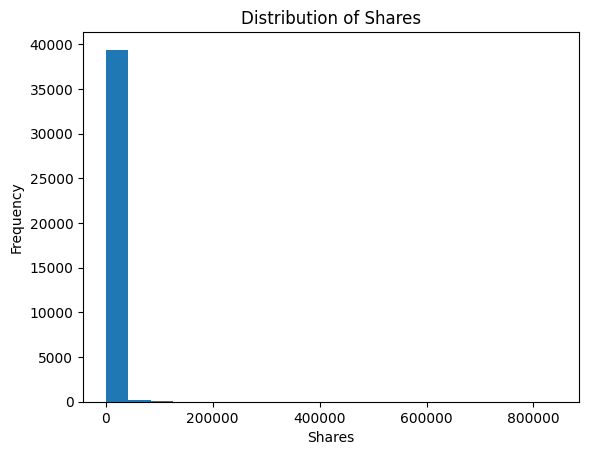

In [131]:
target = news.shares
plt.hist(target, bins=20)
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.title('Distribution of Shares')
plt.show()

 We can see that it is significantly right skewed. This is dangerous because the smaller amount of data points in the right tail will influence the estimates more than the larger bulk of the data. So we are going to try to transform the target.

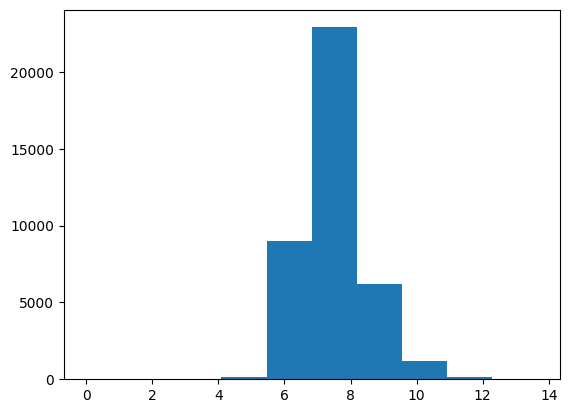

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  logShares  
0                      0.187500     593   6.385194  
1                      0.000000     711   6.566672  
2                      0.000000    1500   7.313220  
3                      0.000000    1200   7.090077  
4                      0.136364     505   6.224558  

[5 rows x 60 columns]

In [132]:
plt.hist(np.log(news.shares))
plt.show()

news["logShares"] = np.log(news.shares)

news.head()

We can see with the log transformation that the distrubution seems to be more normal. So we will use the

2. Build a linear regression model without higher-order terms and identify the most
significant predictors.

We deicded to fit a linear model with the regular "shares" value, then below we will do it with the log transformation so we can compare the values

In [133]:
X = news.drop(columns=['shares', 'logShares'])
y = news.shares

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

reg_prep = LinearRegression()
mod_reg = reg_prep.fit(X_train,y_train)
out_sample_reg = mod_reg.predict(X_test)
mse_1 = np.sqrt(mean_squared_error(y_test,out_sample_reg))
r2_1 = r2_score(y_test,out_sample_reg)
print("rMSE: ",mse_1)
print("R^2: ",r2_1)

rMSE:  9881.601684911759
R^2:  0.027318966761047947


In [134]:
X = news.drop(columns=['shares', 'logShares'])
y = news.logShares

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

reg_prep = LinearRegression()
mod_reg = reg_prep.fit(X_train,y_train)
out_sample_reg = mod_reg.predict(X_test)
mse_2 = np.sqrt(mean_squared_error(y_test,out_sample_reg))
r2_2 = r2_score(y_test,out_sample_reg)
print("rMSE: ",mse_2)
print("R^2: ",r2_2)

rMSE:  0.8683063743180303
R^2:  0.11648564487929103


In [135]:
metrics_data = {
    "Metric": ["rMSE", "R^2"],
    "Model 1": [mse_1, r2_1],
    "Model 2": [mse_2, r2_2]
}

metrics_table = pd.DataFrame(metrics_data)
print(metrics_table)

  Metric      Model 1   Model 2
0   rMSE  9881.601685  0.868306
1    R^2     0.027319  0.116486


Just as we predicted the model that uses the log transformation predictor has a better rMSE, and r2 value but we are looking more at the r2 value because it is a porportion of variance explained.

3. Build a regression tree to identify important predictors.


We are going to build a few models to see which features are going to be the most important. I will be a total of 9 model, 3 models will have the same split, and state but vary length from 3 - 5. We decided to do this to see which features consistently stayed important.

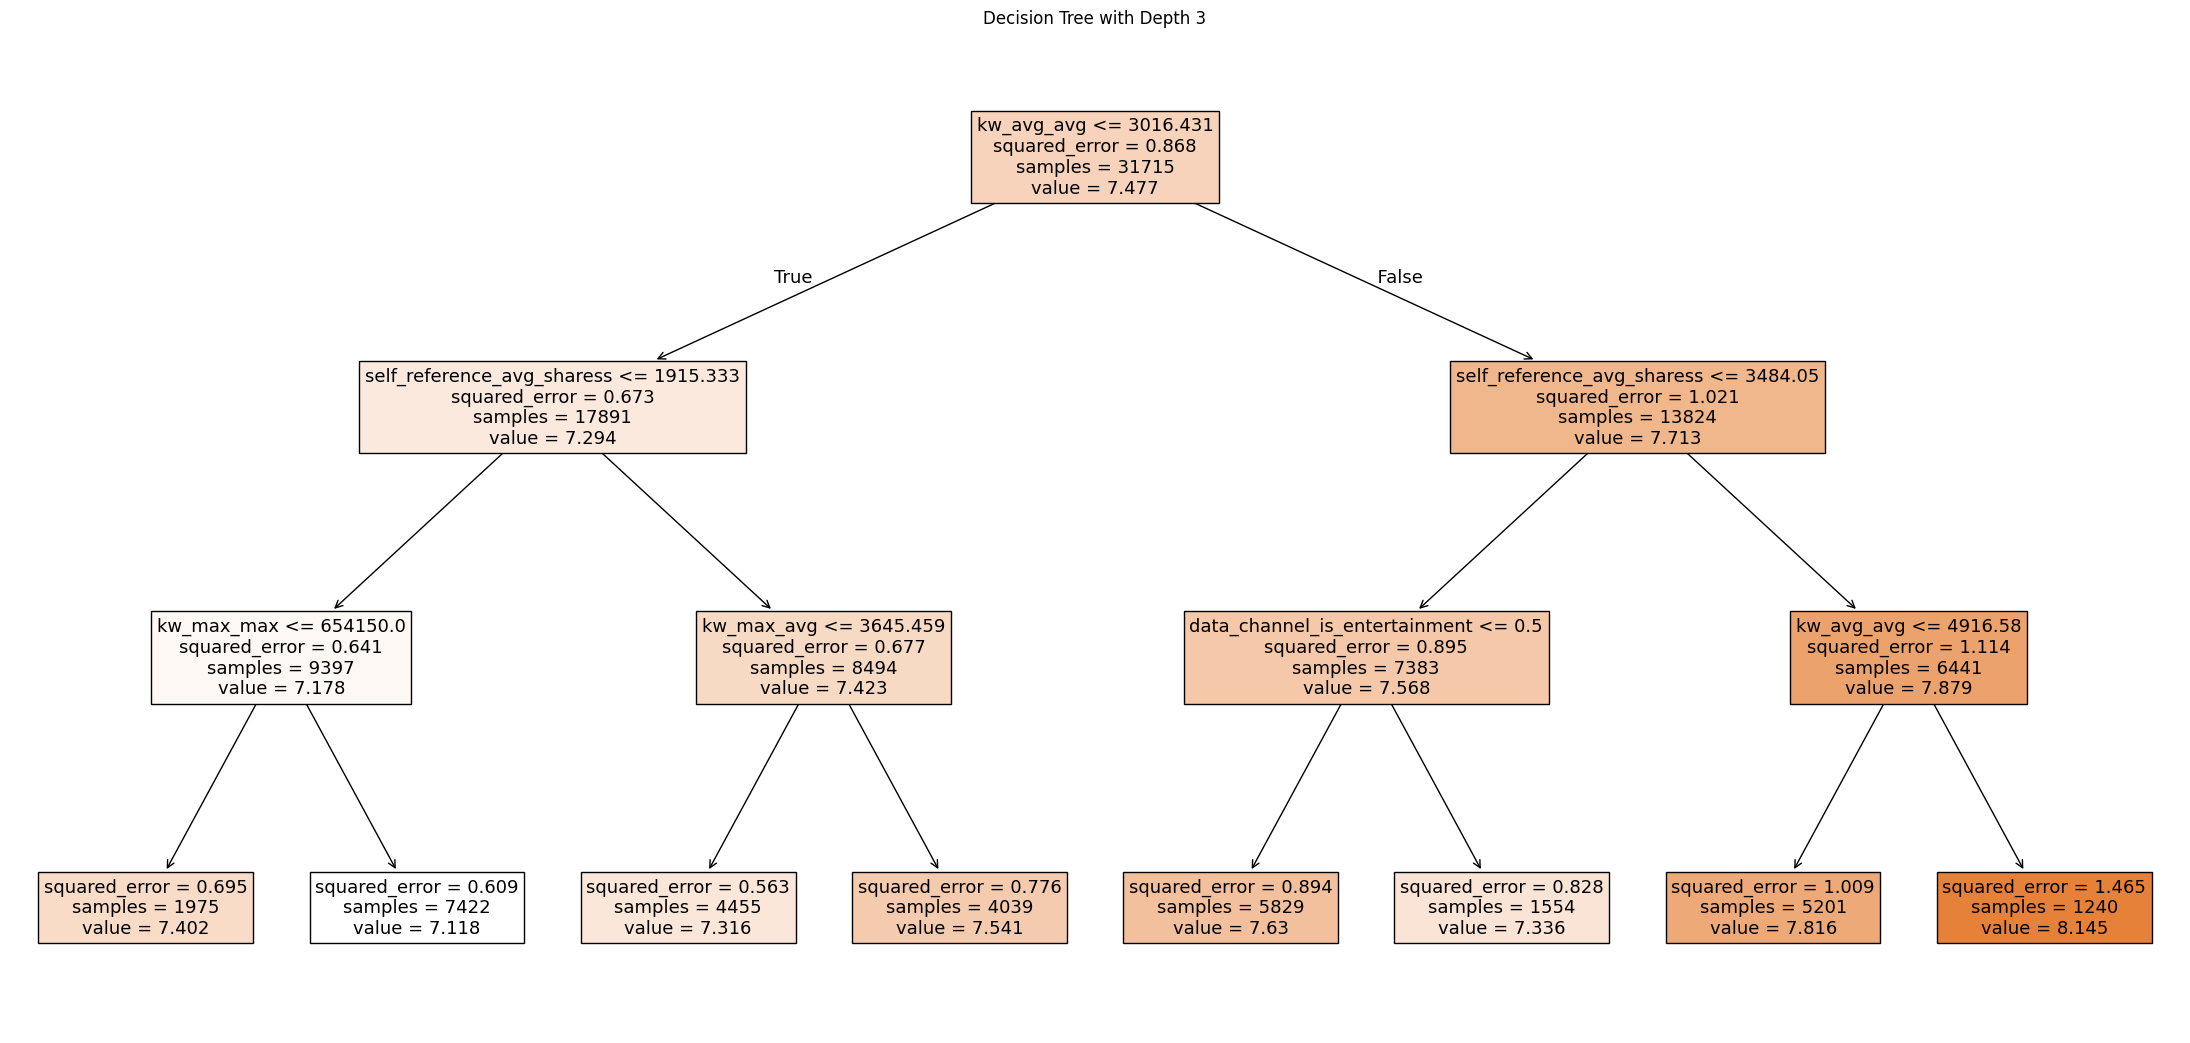

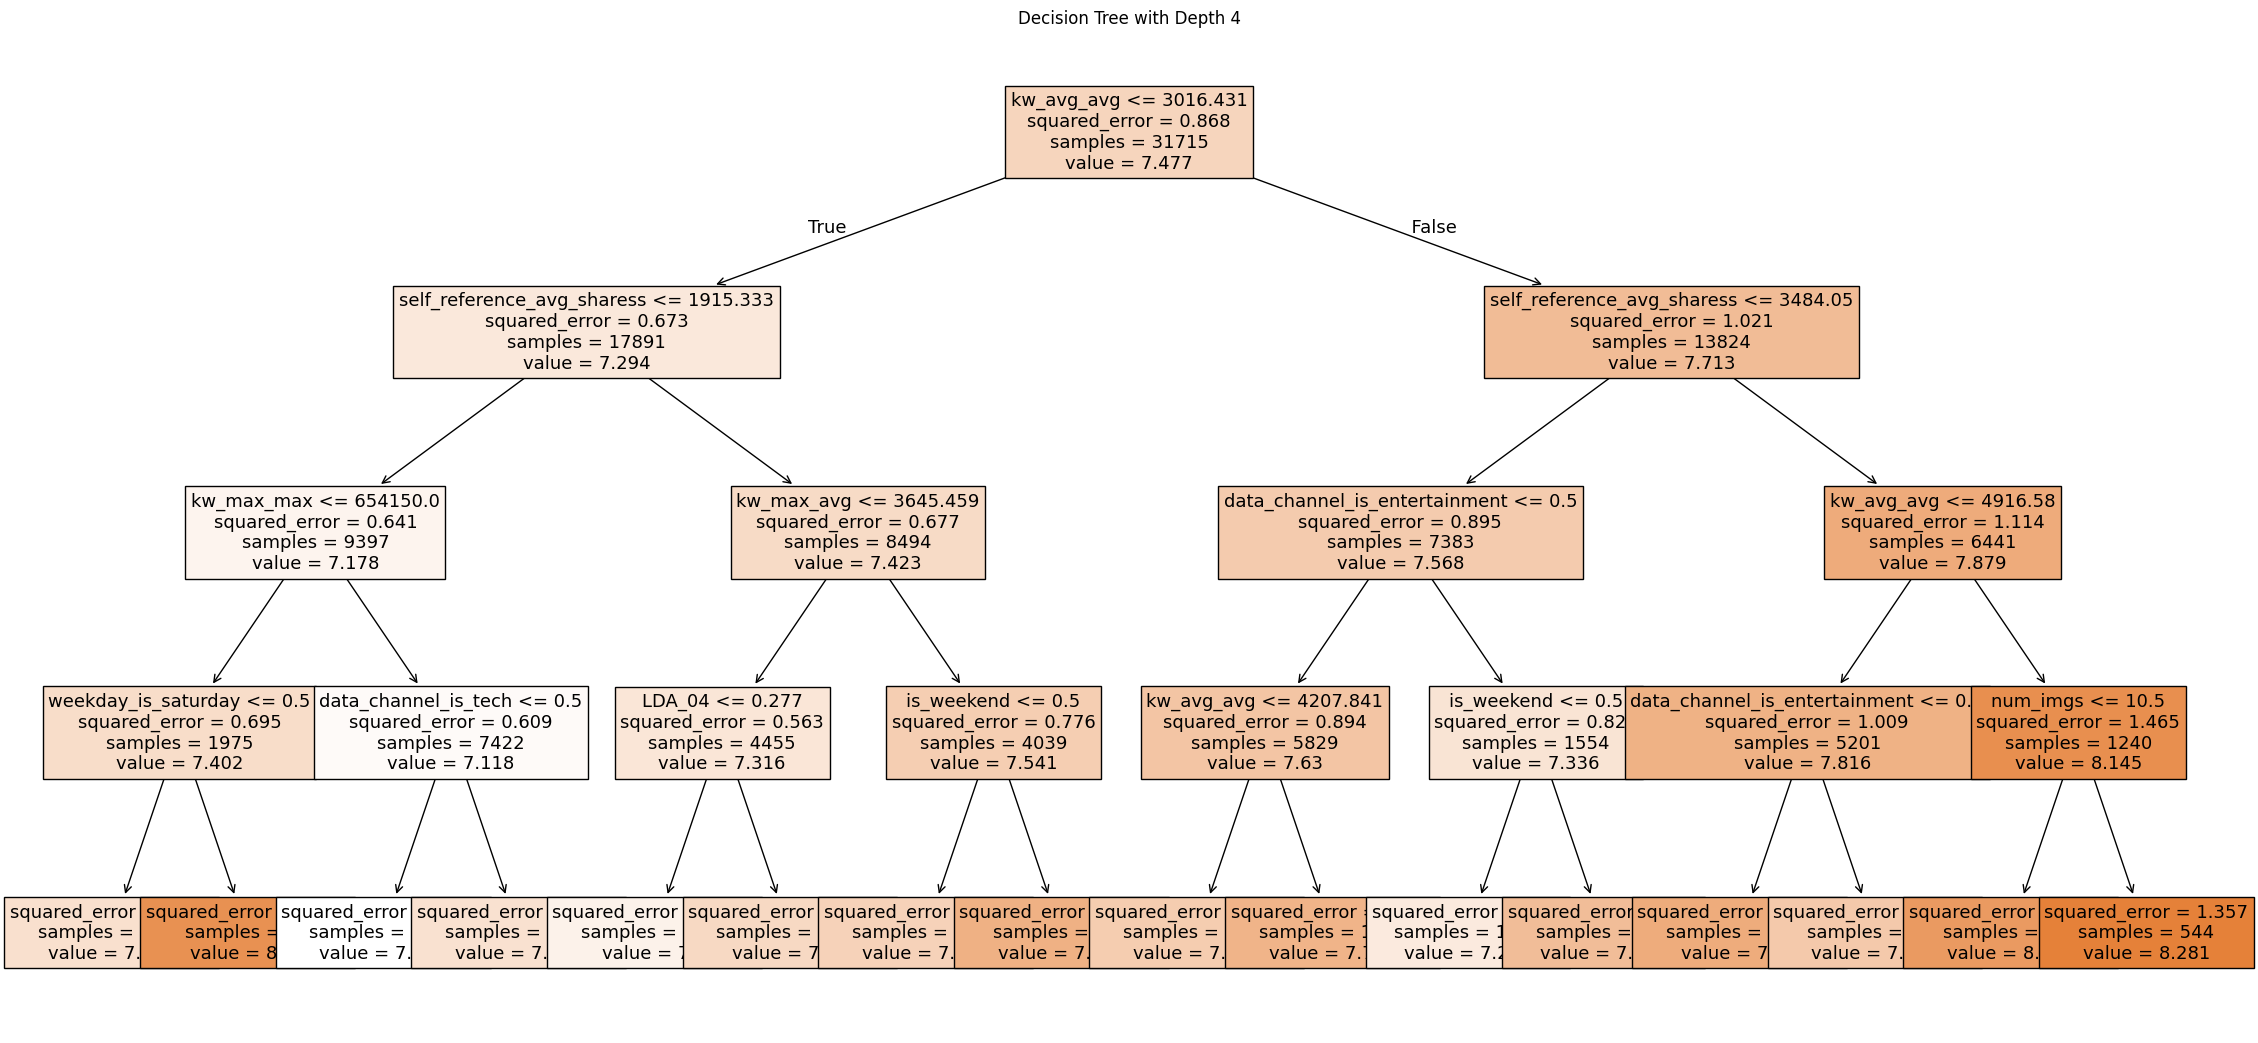

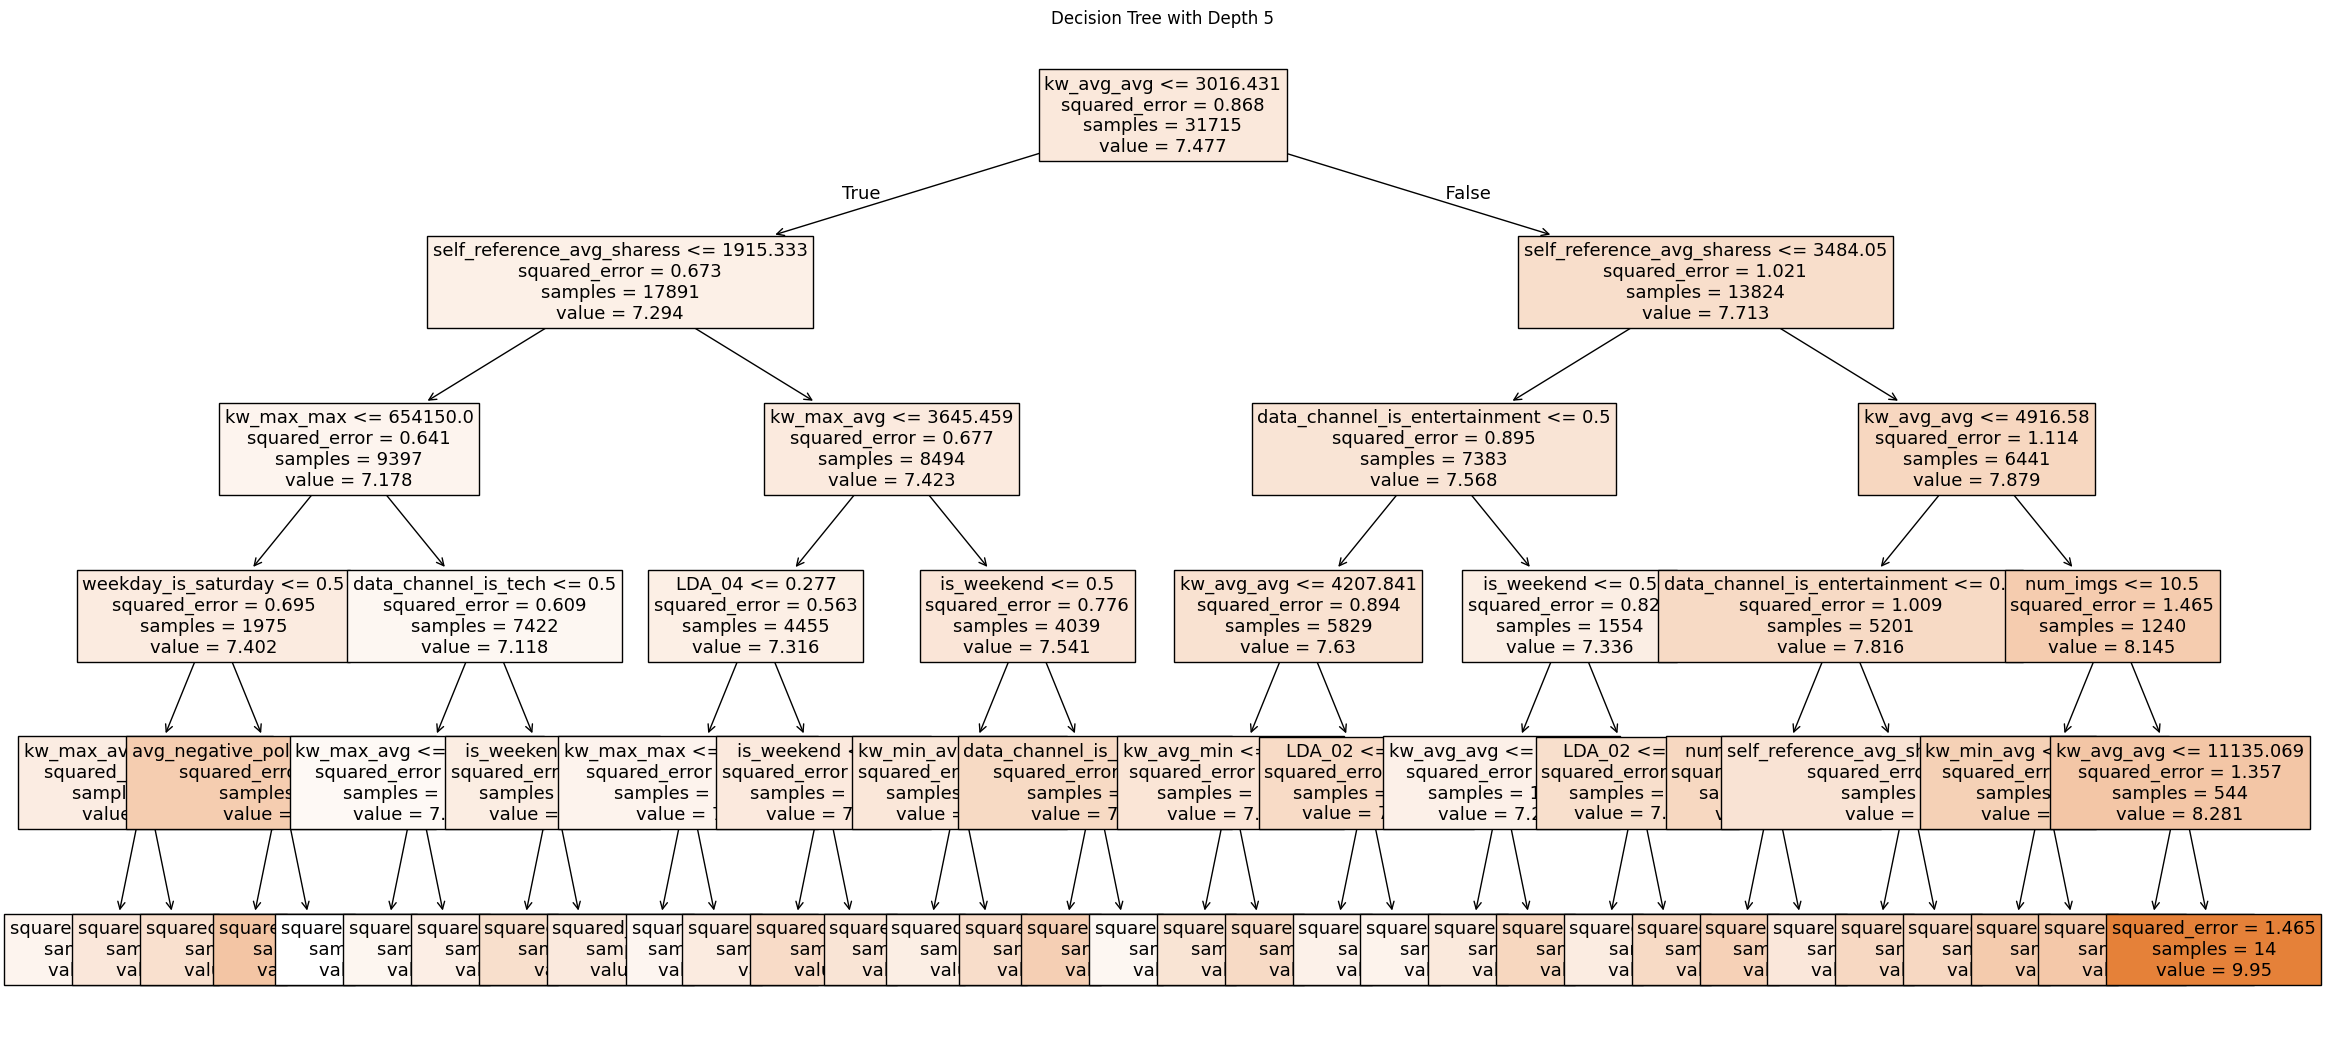

In [136]:
news = pd.read_csv(' https://richardson.byu.edu/220/OnlineNewsPopularity.csv')
news.columns = news.columns.str.strip()
news = news.drop(columns=news.columns[:2])
news["logShares"] = np.log(news.shares)

X_Tree = news.drop(columns=['shares', 'logShares'])
y_Tree = news.logShares

X_Tree = pd.get_dummies(X_Tree)

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_Tree, y_Tree, test_size=0.2, random_state=42)

for depth in range(3, 6):
    tree_prep = DecisionTreeRegressor(max_depth=depth)
    mod_tree = tree_prep.fit(X_train_tree, y_train_tree)

    out_sample_tree = mod_tree.predict(X_test_tree)

    plt.figure(figsize=(28, 13))
    plot_tree(mod_tree, feature_names=X_Tree.columns, fontsize=13, filled=True)
    plt.title(f"Decision Tree with Depth {depth}")
    plt.show()

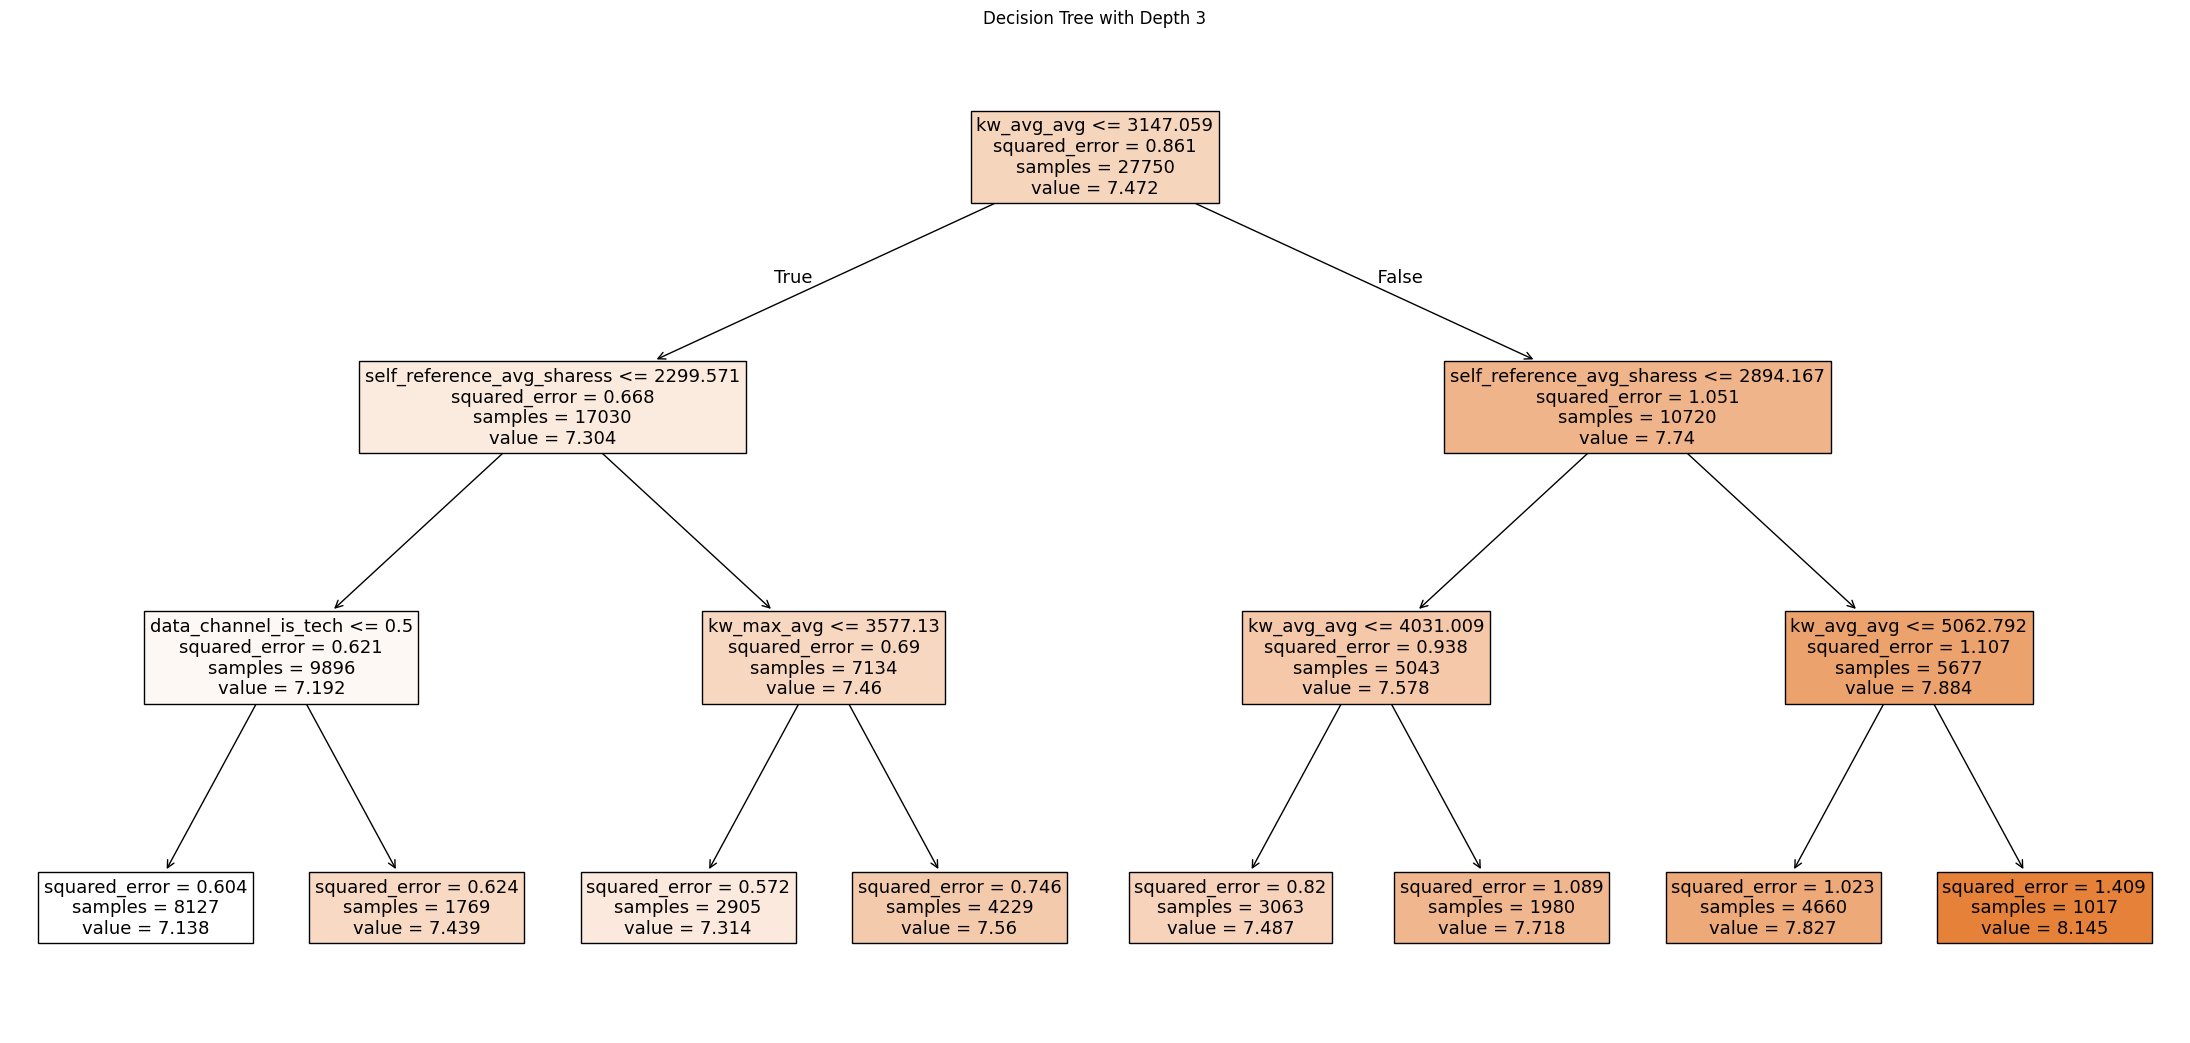

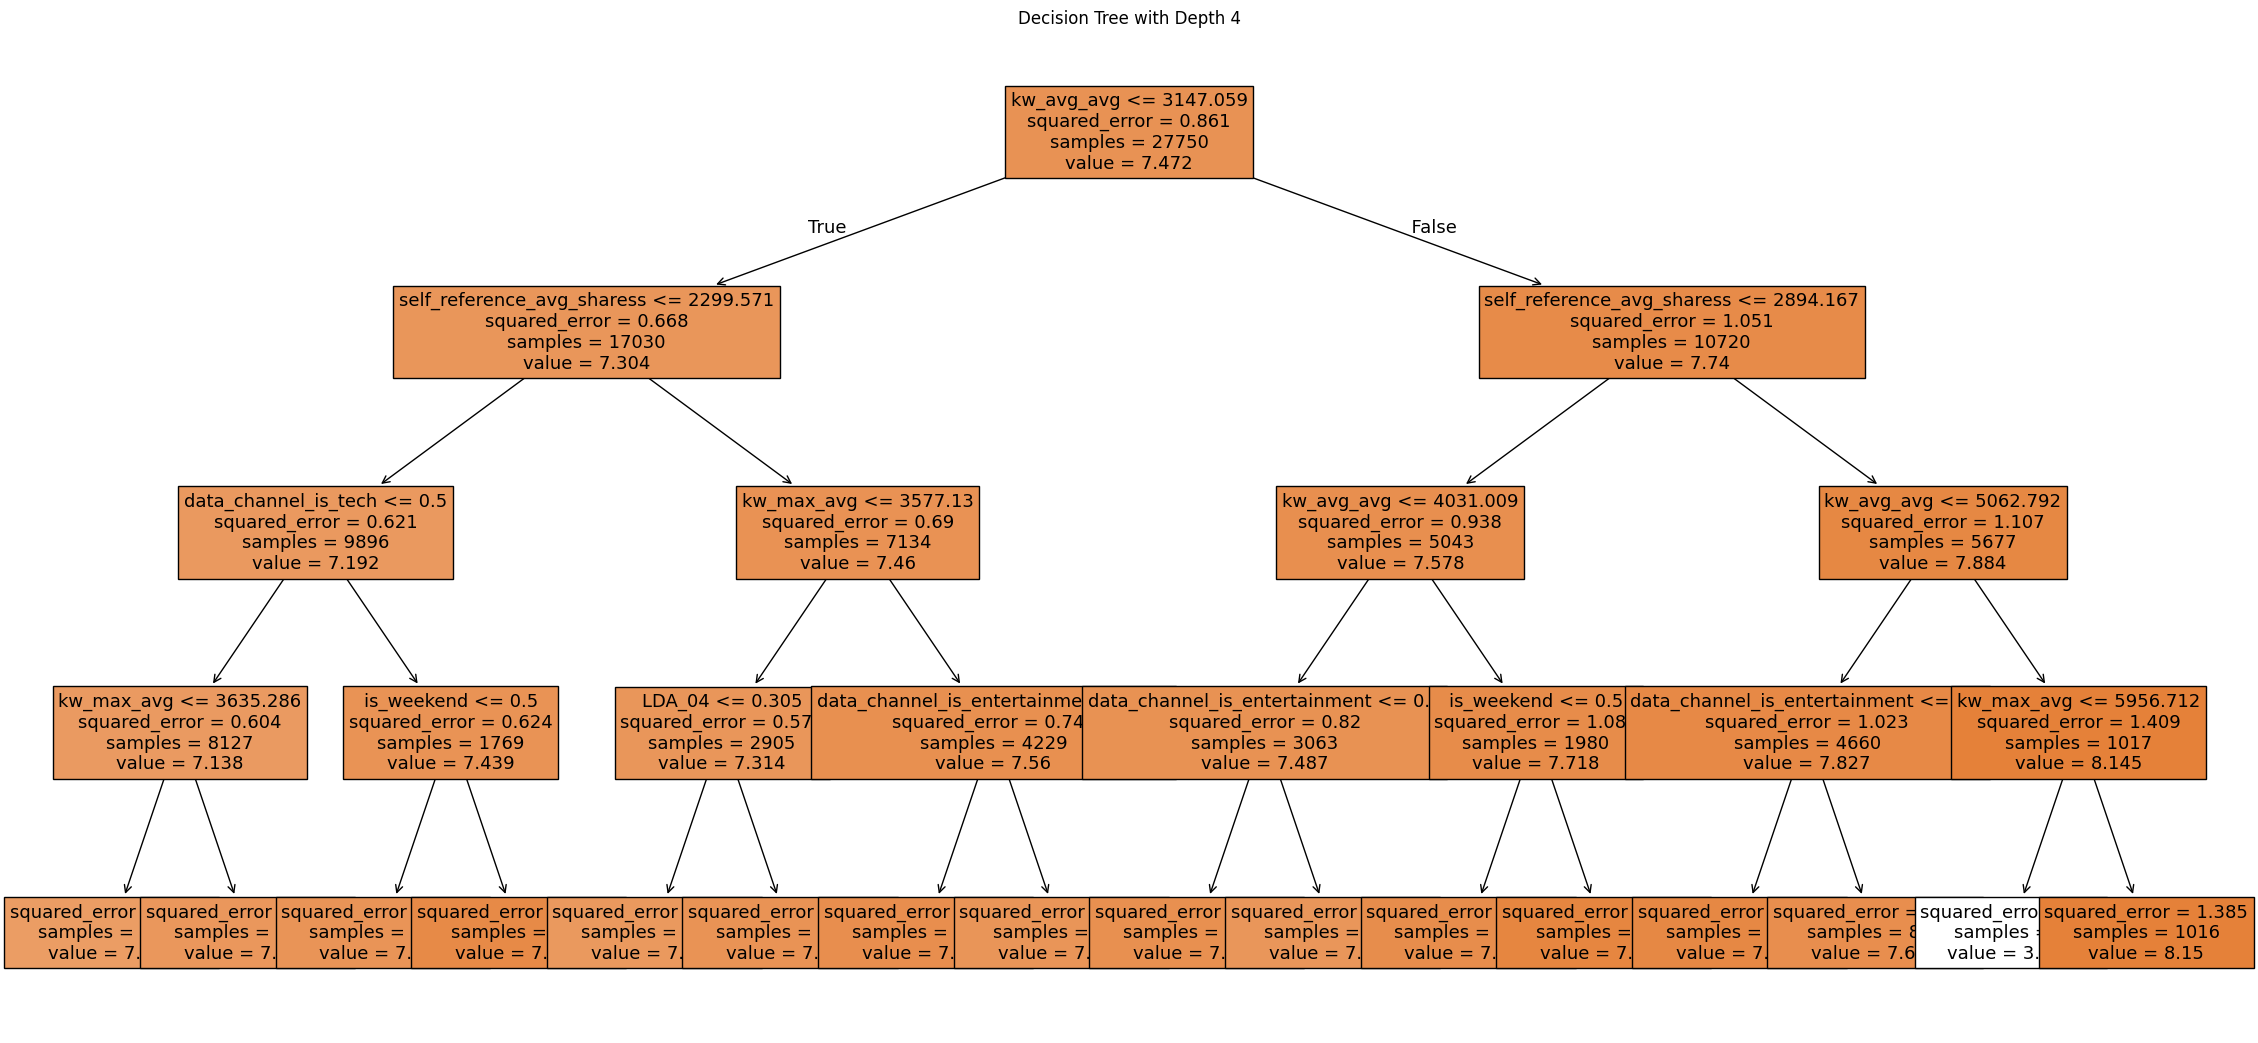

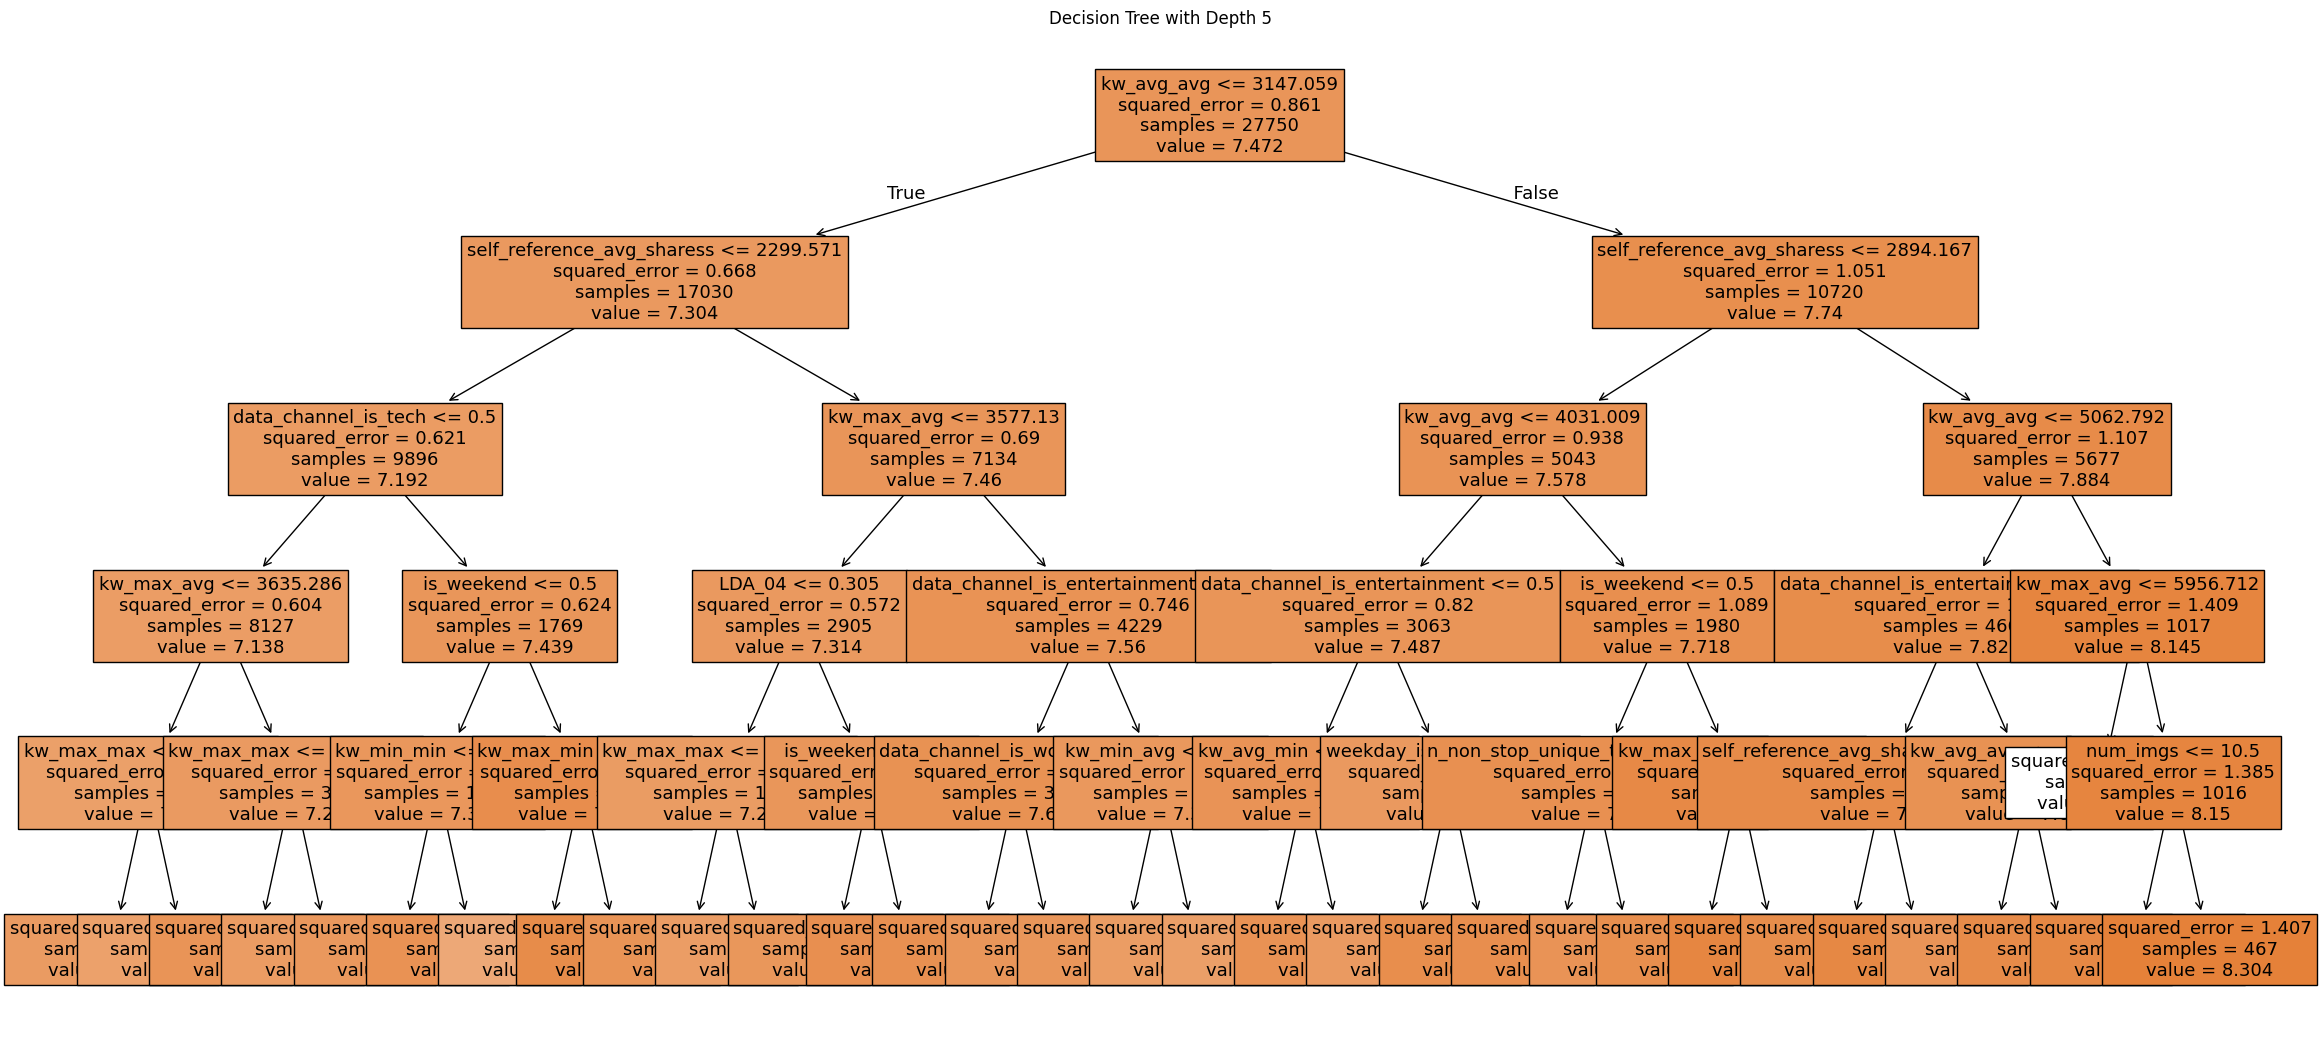

In [137]:
news = pd.read_csv(' https://richardson.byu.edu/220/OnlineNewsPopularity.csv')
news.columns = news.columns.str.strip()
news = news.drop(columns=news.columns[:2])
news["logShares"] = np.log(news.shares)

X_Tree = news.drop(columns=['shares', 'logShares'])
y_Tree = news.logShares

X_Tree = pd.get_dummies(X_Tree)

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_Tree, y_Tree, test_size=0.3, random_state=1992)

for depth in range(3, 6):
    tree_prep = DecisionTreeRegressor(max_depth=depth)
    mod_tree = tree_prep.fit(X_train_tree, y_train_tree)

    out_sample_tree = mod_tree.predict(X_test_tree)

    plt.figure(figsize=(28, 13))
    plot_tree(mod_tree, feature_names=X_Tree.columns, fontsize=13, filled=True)
    plt.title(f"Decision Tree with Depth {depth}")
    plt.show()

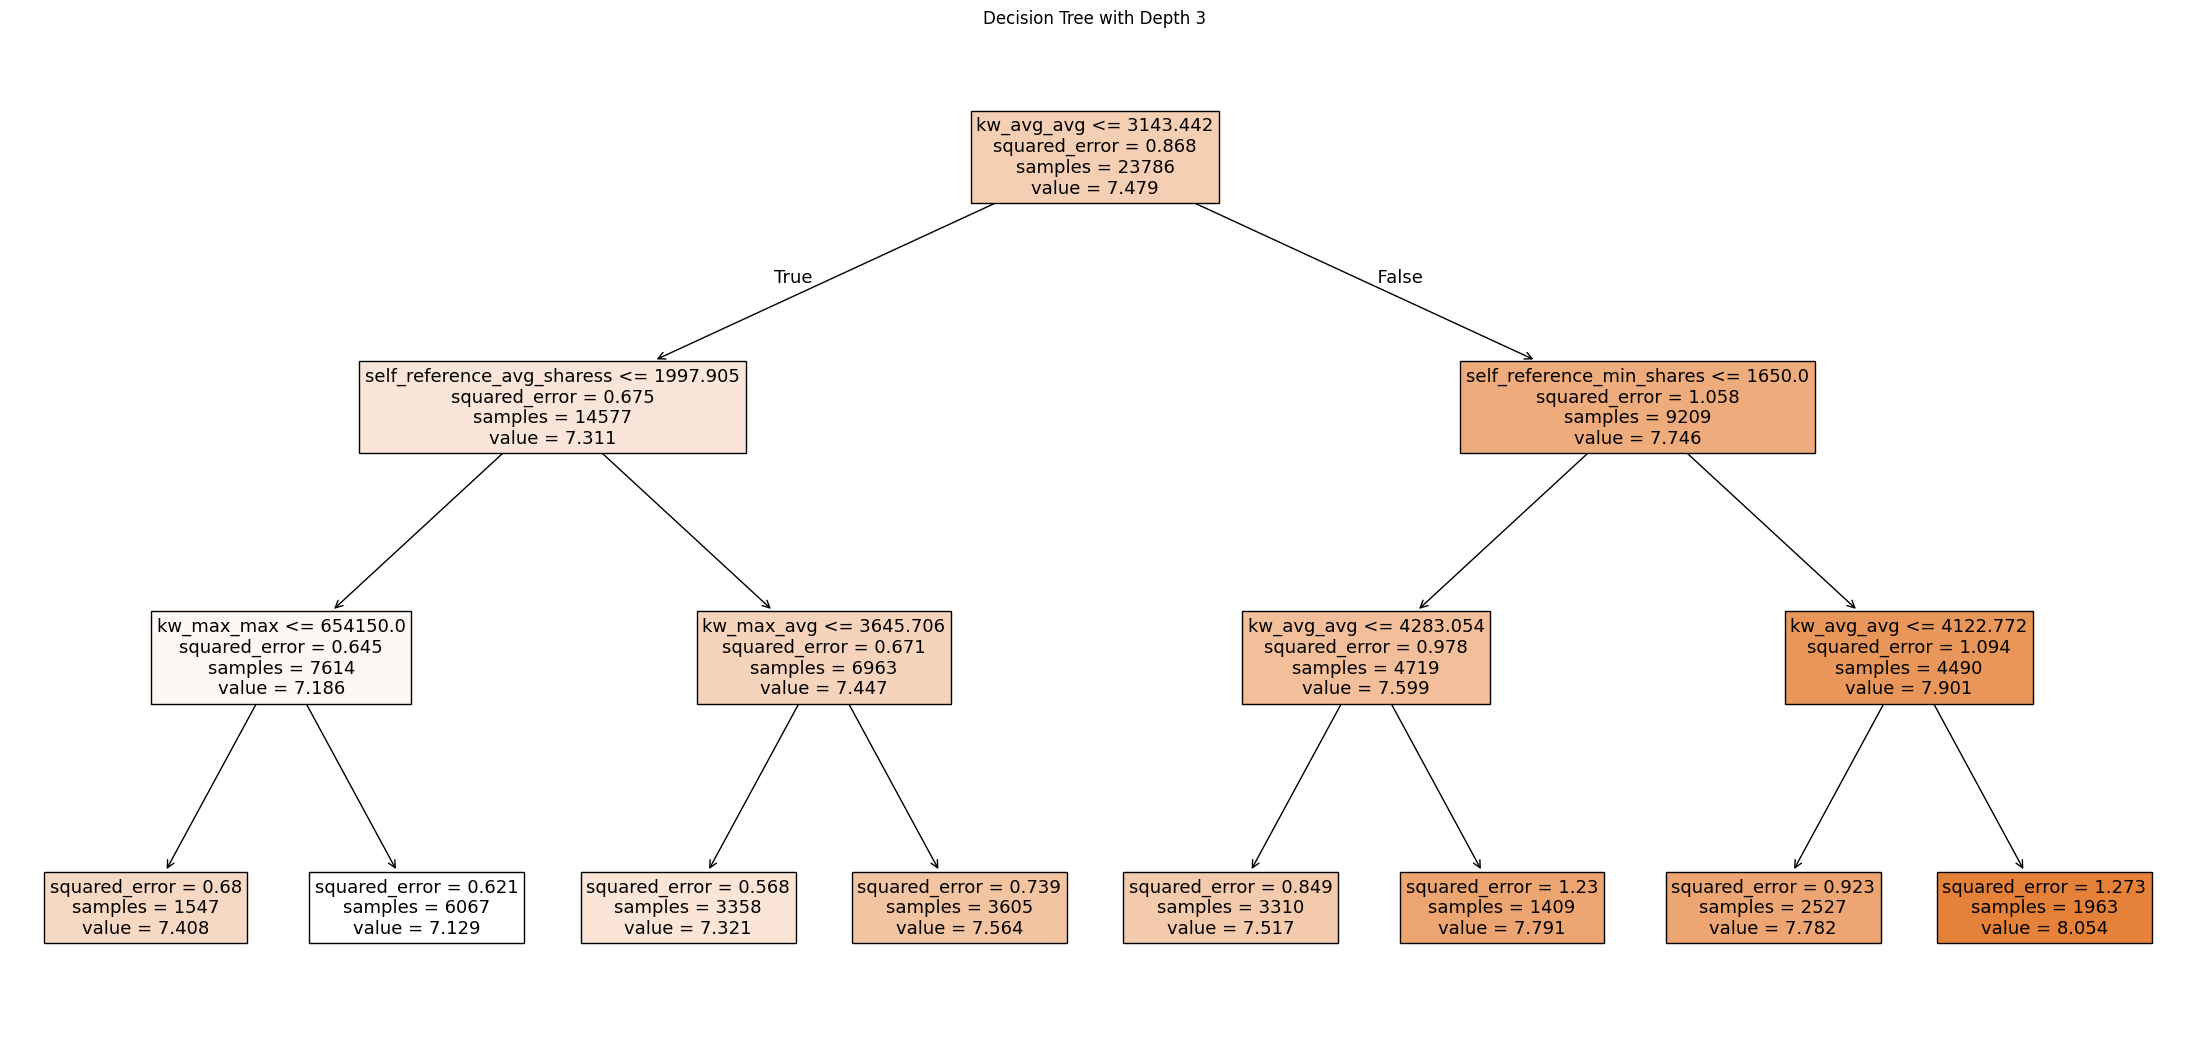

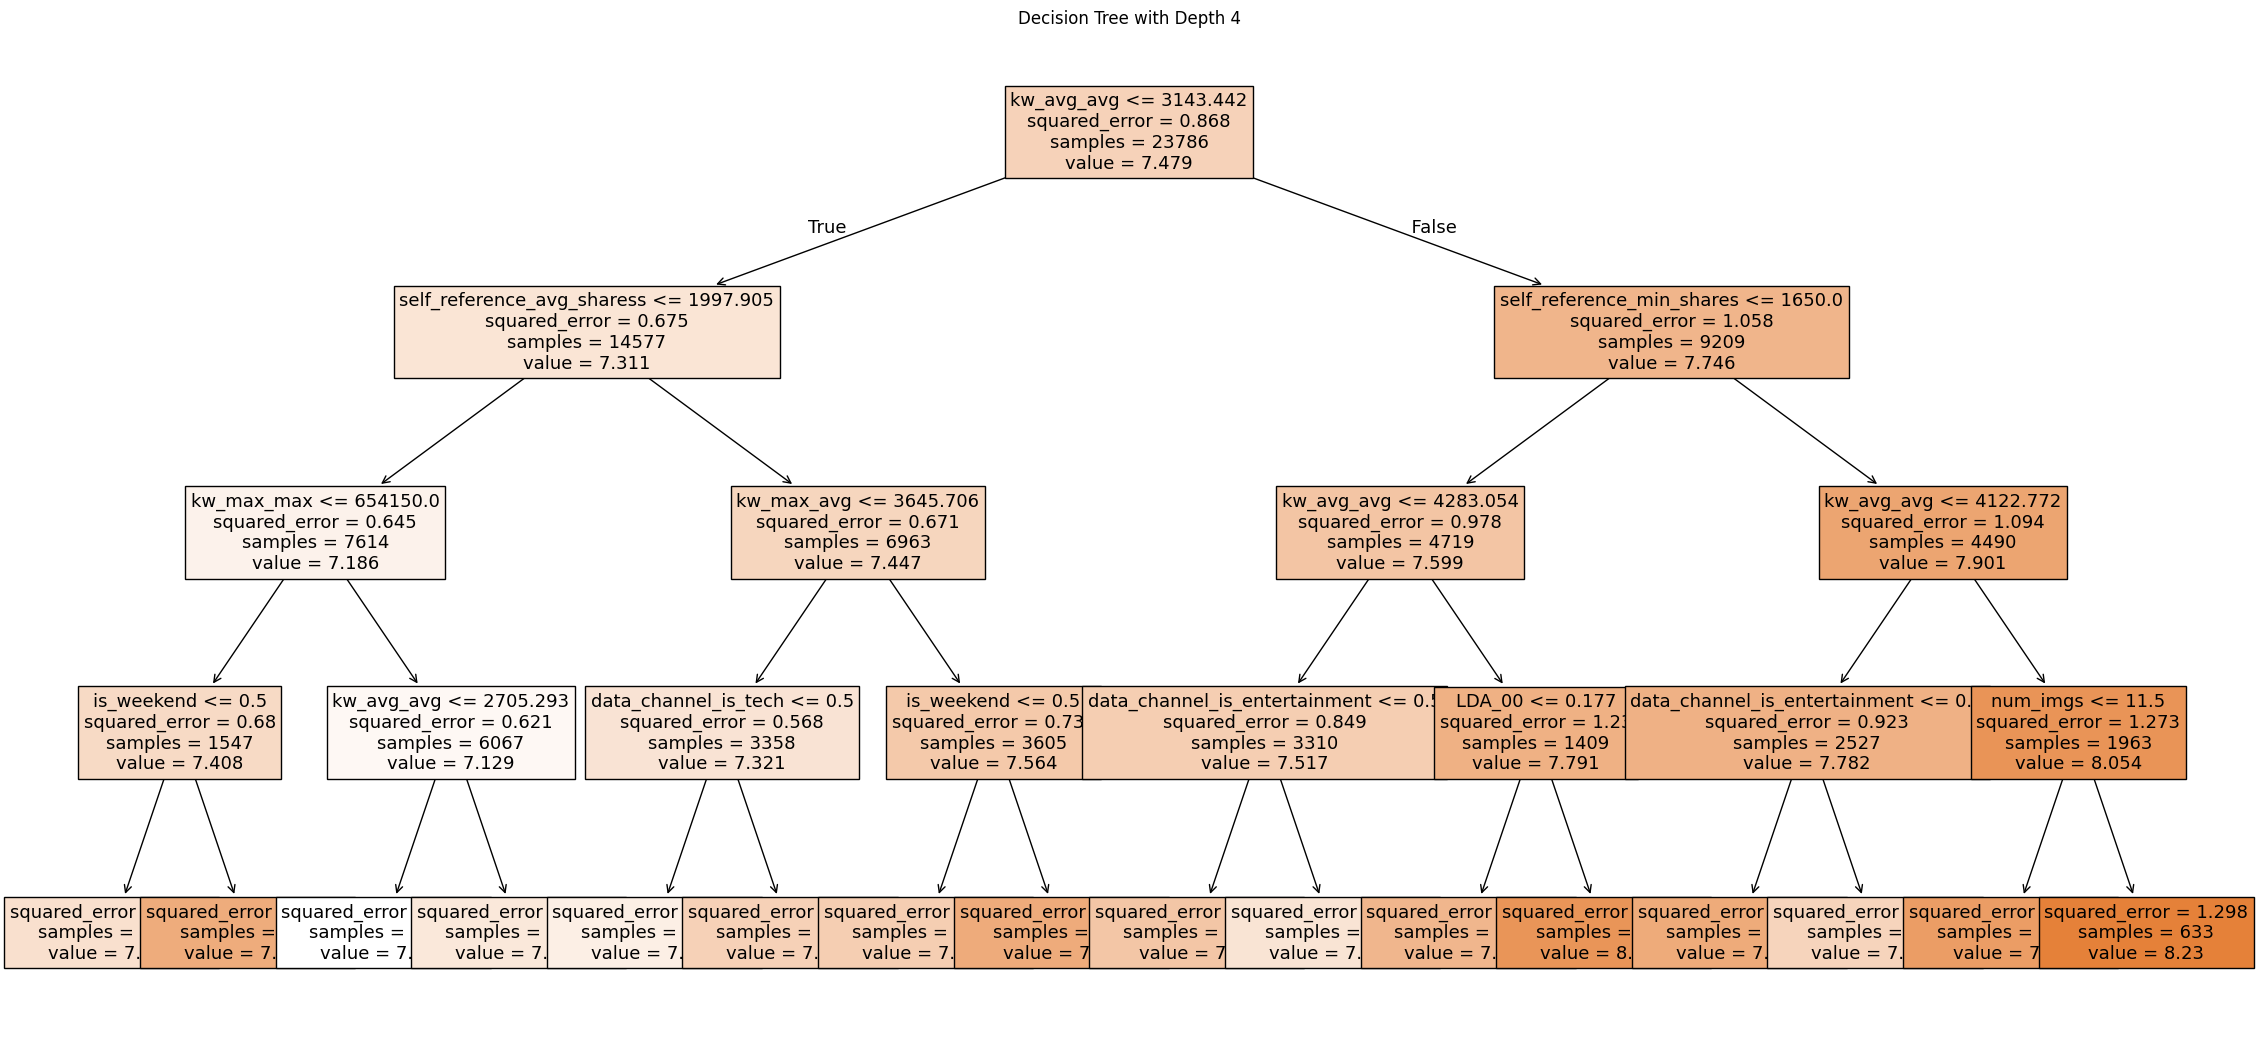

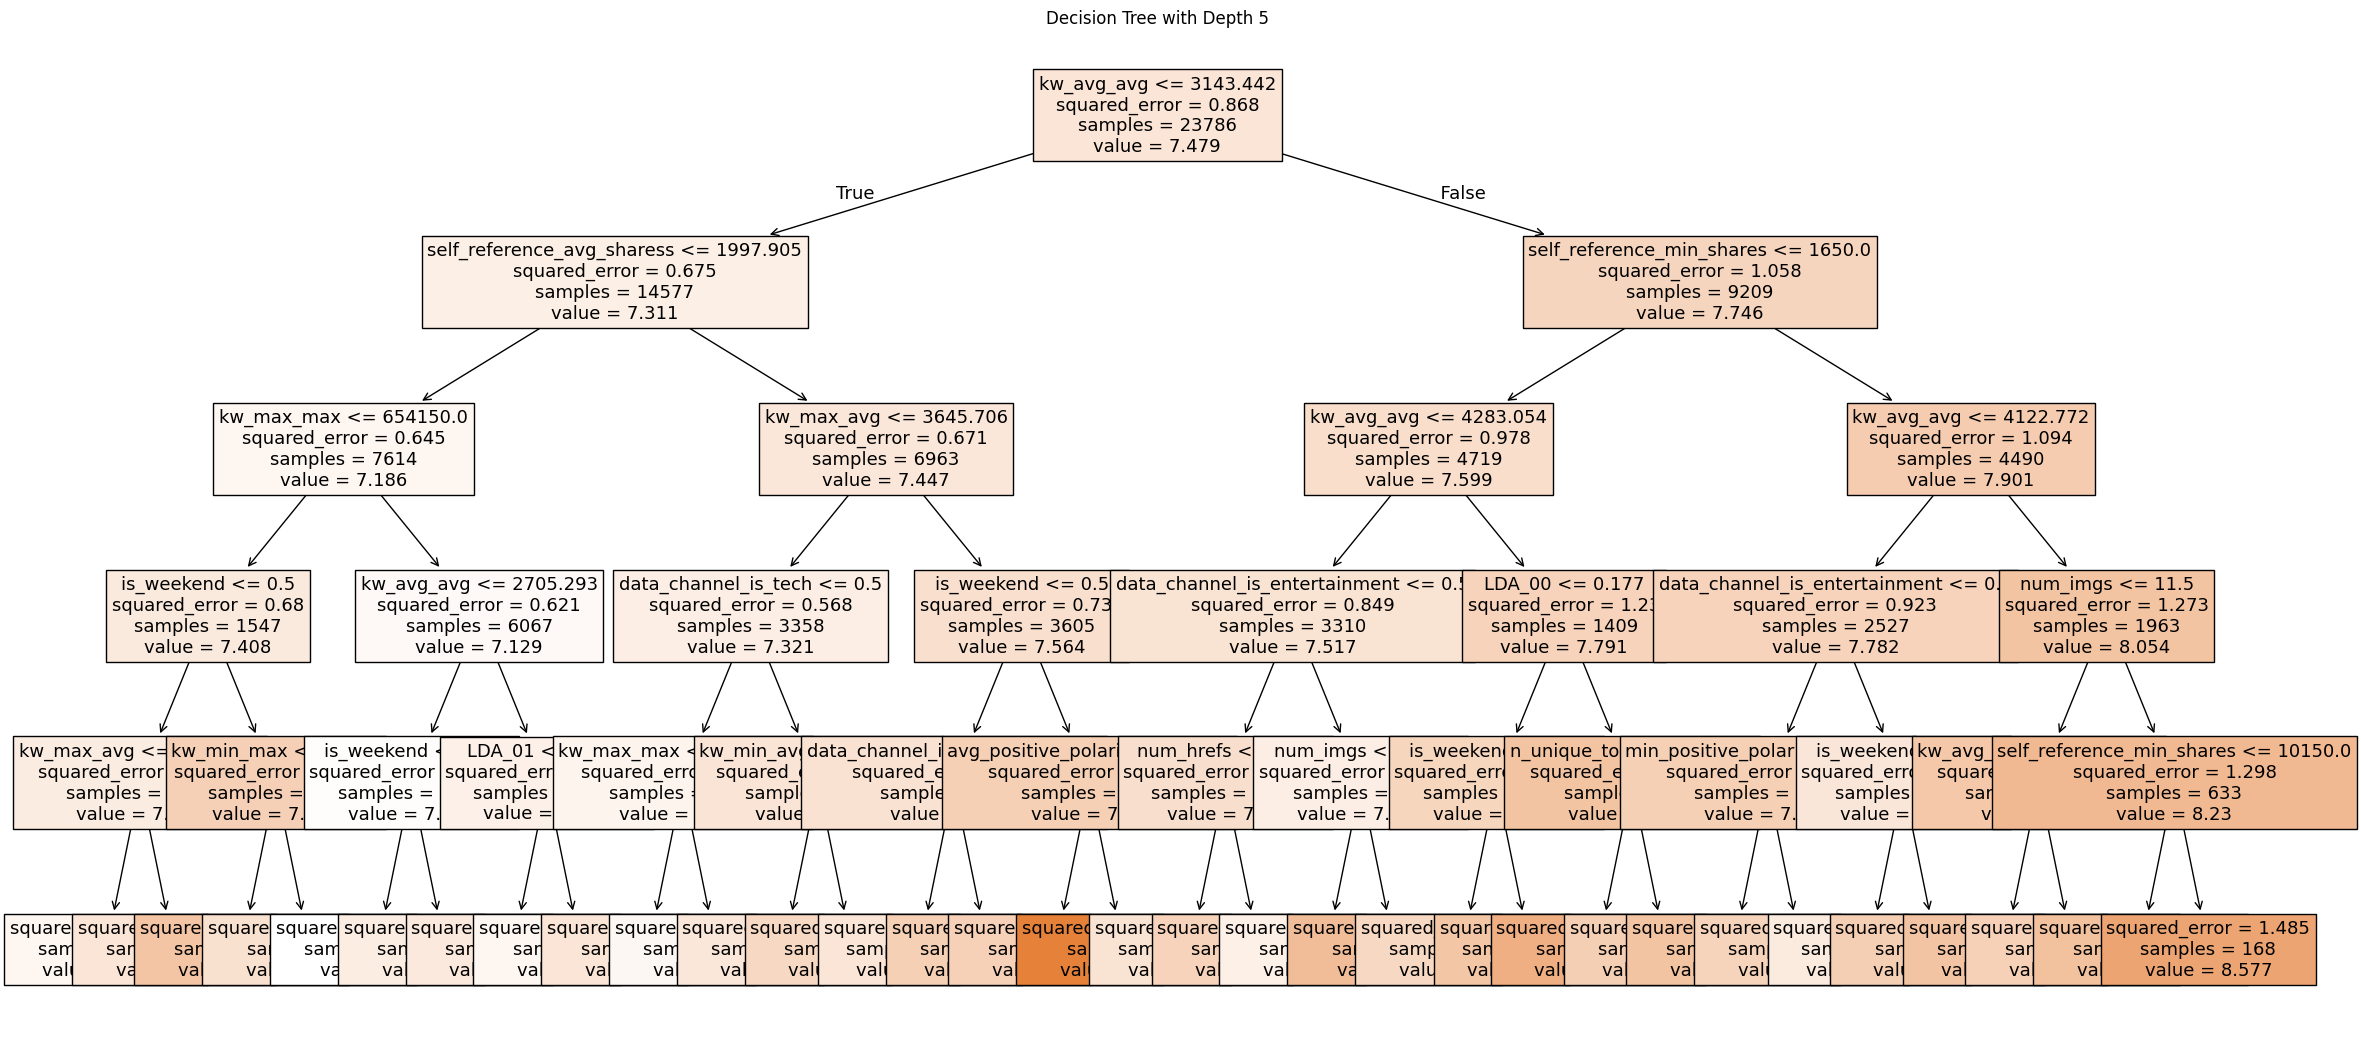

In [138]:
news = pd.read_csv(' https://richardson.byu.edu/220/OnlineNewsPopularity.csv')
news.columns = news.columns.str.strip()
news = news.drop(columns=news.columns[:2])
news["logShares"] = np.log(news.shares)

X_Tree = news.drop(columns=['shares', 'logShares'])
y_Tree = news.logShares

X_Tree = pd.get_dummies(X_Tree)

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_Tree, y_Tree, test_size=0.4, random_state=6)

for depth in range(3, 6):
    tree_prep = DecisionTreeRegressor(max_depth=depth)
    mod_tree = tree_prep.fit(X_train_tree, y_train_tree)

    out_sample_tree = mod_tree.predict(X_test_tree)

    plt.figure(figsize=(28, 13))
    plot_tree(mod_tree, feature_names=X_Tree.columns, fontsize=13, filled=True)
    plt.title(f"Decision Tree with Depth {depth}")
    plt.show()

We could see from all the tree models these features seemed to have the most significane


*   kw_avg_avg
*   self_reference_avg_shares
* kw_max_max
* kw_max_avg
* data_channel_is_entertainment
* is_weekend



4. Select several significant features from steps 2 and 3. Create visualizations or
tables to explore the relationships between these features and the target variable.


kw_avg_avg vs. logShares

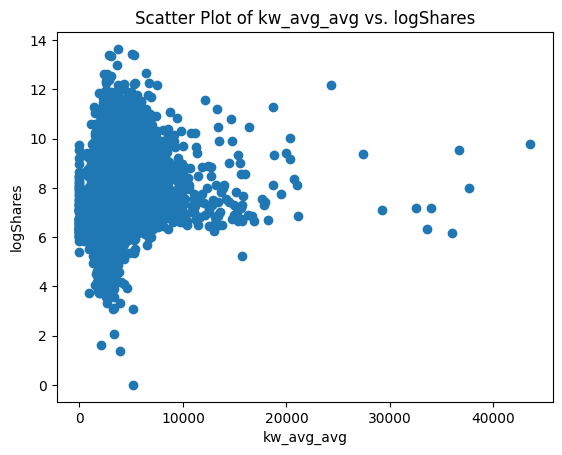

In [139]:
plt.scatter(news['kw_avg_avg'], news['logShares'])
plt.xlabel('kw_avg_avg')
plt.ylabel('logShares')
plt.title('Scatter Plot of kw_avg_avg vs. logShares')
plt.show()

self_reference_avg_shares vs. logShares

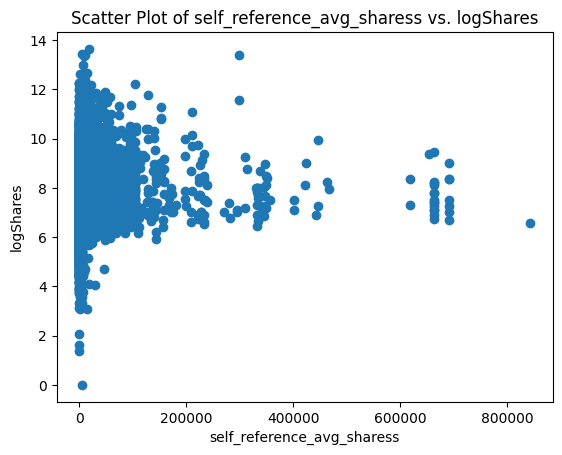

In [140]:
plt.scatter(news['self_reference_avg_sharess'], news['logShares'])
plt.xlabel('self_reference_avg_sharess')
plt.ylabel('logShares')
plt.title('Scatter Plot of self_reference_avg_sharess vs. logShares')
plt.show()

kw_max_max vs. logShares

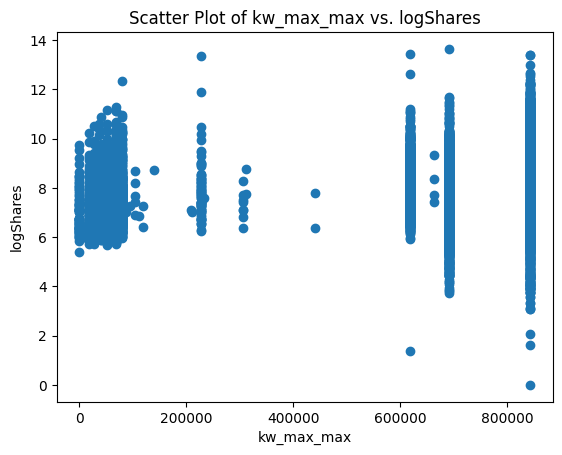

In [141]:
plt.scatter(news['kw_max_max'], news['logShares'])
plt.xlabel('kw_max_max')
plt.ylabel('logShares')
plt.title('Scatter Plot of kw_max_max vs. logShares')
plt.show()

kw_max_avg vs. logShares

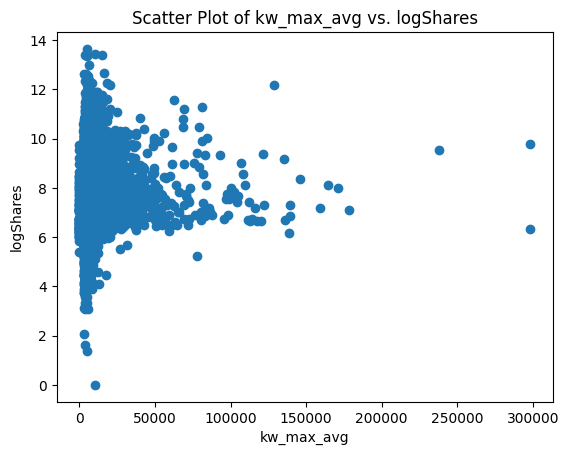

In [142]:
plt.scatter(news['kw_max_avg'], news['logShares'])
plt.xlabel('kw_max_avg')
plt.ylabel('logShares')
plt.title('Scatter Plot of kw_max_avg vs. logShares')
plt.show()

data_channel_is_entertainment vs. logShares

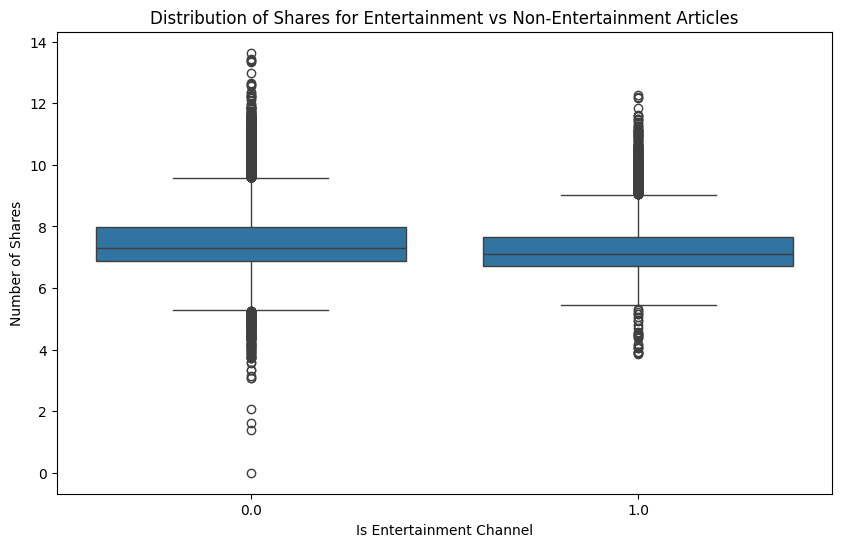

In [143]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='data_channel_is_entertainment', y='logShares', data=news)
plt.title('Distribution of Shares for Entertainment vs Non-Entertainment Articles')
plt.xlabel('Is Entertainment Channel')
plt.ylabel('Number of Shares')
plt.show()

is_weekend vs. logShares


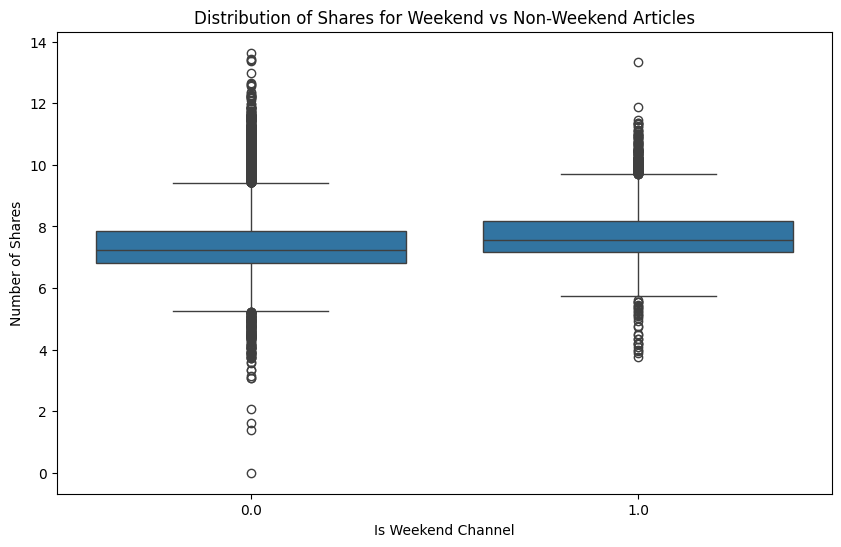

In [144]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_weekend', y='logShares', data=news)
plt.title('Distribution of Shares for Weekend vs Non-Weekend Articles')
plt.xlabel('Is Weekend Channel')
plt.ylabel('Number of Shares')
plt.show()

5. Use appropriate methods to remove insignificant variables from the model.

In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Load and preprocess data
news = pd.read_csv('https://richardson.byu.edu/220/OnlineNewsPopularity.csv')
news.columns = news.columns.str.strip()
news = news.drop(columns=news.columns[:2])
news["logShares"] = np.log(news.shares)

X_Tree = news.drop(columns=['shares', 'logShares'])
y_Tree = news.logShares

X_Tree = pd.get_dummies(X_Tree)

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_Tree, y_Tree, test_size=0.2, random_state=42)

tree_prep = DecisionTreeRegressor(max_depth=3)
mod_tree = tree_prep.fit(X_train_tree, y_train_tree)

out_sample_tree = mod_tree.predict(X_test_tree)

feature_importances = mod_tree.feature_importances_
feature_names = X_Tree.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature importances:")
print(importance_df.head())

Feature importances:
                          Feature  Importance
25                     kw_avg_avg    0.611344
28     self_reference_avg_sharess    0.248248
21                     kw_max_max    0.052034
24                     kw_max_avg    0.044381
12  data_channel_is_entertainment    0.043993


In [149]:
dict(zip(X_Tree.columns,mod_tree.feature_importances_))


{'n_tokens_title': 0.0,
 'n_tokens_content': 0.0,
 'n_unique_tokens': 0.0,
 'n_non_stop_words': 0.0,
 'n_non_stop_unique_tokens': 0.0,
 'num_hrefs': 0.0,
 'num_self_hrefs': 0.0,
 'num_imgs': 0.0,
 'num_videos': 0.0,
 'average_token_length': 0.0,
 'num_keywords': 0.0,
 'data_channel_is_lifestyle': 0.0,
 'data_channel_is_entertainment': 0.04399278666457599,
 'data_channel_is_bus': 0.0,
 'data_channel_is_socmed': 0.0,
 'data_channel_is_tech': 0.0,
 'data_channel_is_world': 0.0,
 'kw_min_min': 0.0,
 'kw_max_min': 0.0,
 'kw_avg_min': 0.0,
 'kw_min_max': 0.0,
 'kw_max_max': 0.05203449594043692,
 'kw_avg_max': 0.0,
 'kw_min_avg': 0.0,
 'kw_max_avg': 0.04438081888280398,
 'kw_avg_avg': 0.6113438817598231,
 'self_reference_min_shares': 0.0,
 'self_reference_max_shares': 0.0,
 'self_reference_avg_sharess': 0.24824801675236002,
 'weekday_is_monday': 0.0,
 'weekday_is_tuesday': 0.0,
 'weekday_is_wednesday': 0.0,
 'weekday_is_thursday': 0.0,
 'weekday_is_friday': 0.0,
 'weekday_is_saturday': 0.0,
 

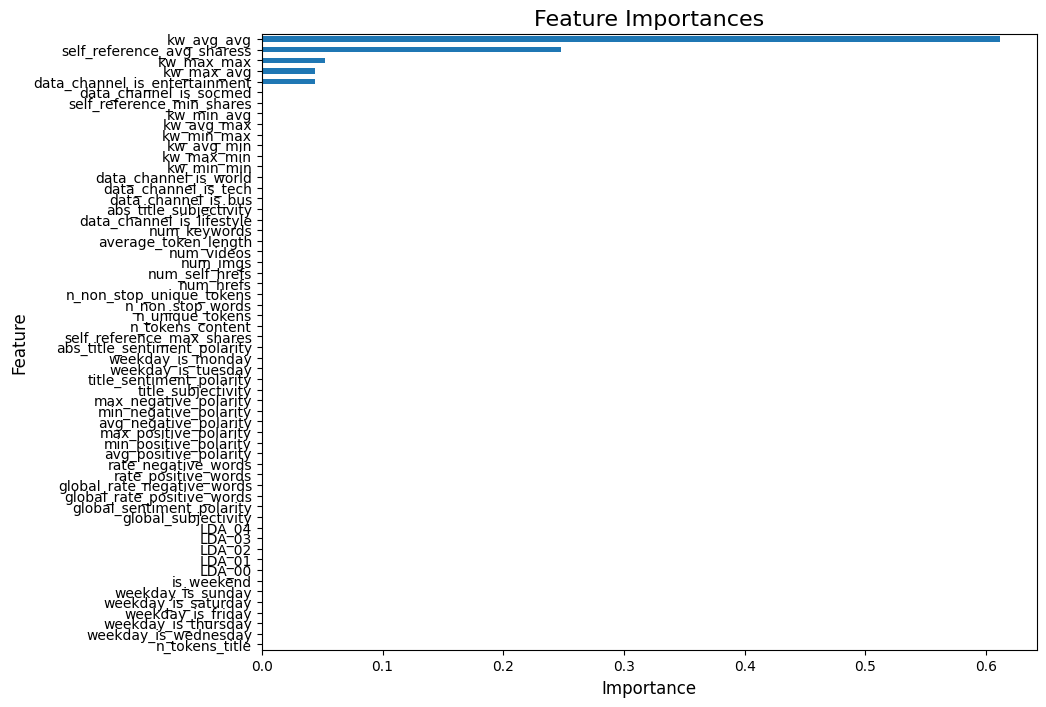

In [156]:
importances = pd.Series(mod_tree.feature_importances_, index=X_Tree.columns)
importances = importances.sort_values()

plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

As we could tell from the graphs and the tree it looks like we would want to exclude most of the features and only use:
*   kw_avg_avg
*   self_reference_avg_shares
* kw_max_max
* kw_max_avg
* data_channel_is_entertainment

In [158]:
new_X = news[['kw_avg_avg', 'self_reference_avg_sharess', 'kw_max_max', 'kw_max_avg', 'data_channel_is_entertainment']]
new_y = news.logShares